<a href="https://colab.research.google.com/gist/guardiaum/30d02ad7f806788b1c212d83057be703/aula-05-pratica-languague-modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

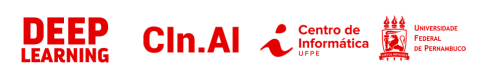

# Vamos definir um modelo de linguagem a nível de caracteres.


Fonte: Esse notebook é baseado na aula do [Andrej Karpathy](https://karpathy.ai/), um dos membros fundadores da OpenAI, em seu canal no [YouTube](https://www.youtube.com/watch?v=kCc8FmEb1nY)

### Download, Carregamento e Tokenização do Corpus de Treino

In [ ]:
# Fazendo o download e carregando o corpus que será utilizado para treino
# É um pequeno conjunto dos escritos de shakespeare
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-02-02 23:26:53--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.01s   

2023-02-02 23:26:54 (101 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [ ]:
# verificando o tamanho do conjunto de dados em número de caracteres
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [ ]:
# Uma breve inspeção desses dados
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [ ]:
chars = sorted(list(set(text)))   # o conjunto de caracteres únicos que existem no corpus
print("Unique Characters: {0}".format(''.join(chars)))

vocab_size = len(chars)           # tamanho do vocabulário
print(vocab_size)

Unique Characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [ ]:
# Mapeando cada caractere a um índice
c2i = { ch:i for i,ch in enumerate(chars) }     # caractere para índice
i2c = { i:ch for i,ch in enumerate(chars) }     # indice para caractere

# encoder: codifica um conjunto de caracteres de uma string e converte a uma lista de inteiros
encode = lambda s: [c2i[c] for c in s]

# decoder: decodifica uma lista de inteiros, transformando-os na string de origem
decode = lambda l: ''.join([i2c[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [ ]:
import torch

# Devemos codificar todo o texto e armazená-lo em um tensor
texto_codificado = encode(text)
data = torch.tensor(texto_codificado, dtype=torch.long)

print(data.shape, data.dtype)

# Os 1000 caracteres que visualizamos anteriormente
print(data[:1000])

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [ ]:
# Precisamos separar o nosso conjunto de dados em conjuntos de treino e validação
# vamos utilizar os primeiros 90% caracteres como treino e o restante será utilizado para validação
n = int(0.9*len(data))
train_data = data[:n]
val_data = data[n:]

In [ ]:
print("train_data.shape: {0}".format(train_data.shape))
print("val_data.shape: {0}".format(val_data.shape))

train_data.shape: torch.Size([1003854])
val_data.shape: torch.Size([111540])


### A intuição utilizada para treino do modelo de linguagem

In [ ]:
# também chamada de dimensão de tempo (time)
# definirá o tamanho máximo do pedaço de texto utilizado por vez
tamanho_max_seq = 8           
train_data[:tamanho_max_seq]

tensor([18, 47, 56, 57, 58,  1, 15, 47])

In [ ]:
train_data[:tamanho_max_seq+1]   # Deslocamento +1. Target para predição

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [ ]:
# Exemplo: Como é realizado o treino com um único pedaço do corpus?
x = train_data[:tamanho_max_seq]       # [18, 47, 56, 57, 58,  1, 15, 47]

# Deslocamento +1: dado um contexto qualquer (conjunto de caracteres), o modelo é treinado para aprender o caractere seguinte
y = train_data[1:tamanho_max_seq+1]    # [47, 56, 57, 58,  1, 15, 47, 58]

# treino utilizando um pedaço do corpus
# o modelo irá aprender a prever um caractere dado um determinado contexto que pode ir de 1 até tamanho_max da sequencia
for t in range(tamanho_max_seq):
    context = x[:t+1]
    target = y[t]
    print(f"Entrada: {context} \t-> Target: {target}")

Entrada: tensor([18]) 	-> Target: 47
Entrada: tensor([18, 47]) 	-> Target: 56
Entrada: tensor([18, 47, 56]) 	-> Target: 57
Entrada: tensor([18, 47, 56, 57]) 	-> Target: 58
Entrada: tensor([18, 47, 56, 57, 58]) 	-> Target: 1
Entrada: tensor([18, 47, 56, 57, 58,  1]) 	-> Target: 15
Entrada: tensor([18, 47, 56, 57, 58,  1, 15]) 	-> Target: 47
Entrada: tensor([18, 47, 56, 57, 58,  1, 15, 47]) 	-> Target: 58


### Utilizando o conceito de treino em "lotes" (batches)
É utilizado para aumentar a velocidade de treino explorando o poder computacional presente em GPUs, possibilitando o processamento de vários pedaços de texto de forma paralela.

In [ ]:
torch.manual_seed(42)
# definição da dimensão de batch
# define a quantidade de sequências que serão processadas em paralelo
tamanho_batch = 4

# define o tamanho máximo da sequência para predição
tamanho_max_seq = 8

In [ ]:
ix = torch.randint(len(train_data) - 8, (4,))
torch.stack([train_data[i:i+tamanho_max_seq] for i in ix])

tensor([[57,  1, 46, 47, 57,  1, 50, 53],
        [ 1, 58, 46, 43, 56, 43,  1, 41],
        [17, 26, 15, 17, 10,  0, 32, 53],
        [57, 58,  6,  1, 61, 47, 58, 46]])

In [ ]:
# split (str): 'train', 'valid'
def get_batch(split):
    #treino ou validação?
    data = train_data if split == 'train' else val_data
    
    # seleção randômica dos índices iniciais de cada lote (tamanho_batch)
    # len(data) - tamanho_max_seq: evita-se selecionar os últimos índices 
    # do corpus visto que não existirá índice a ser usado como target
    ix = torch.randint(len(data) - tamanho_max_seq, (tamanho_batch,))
    
    # para cada índice inicial selecionado randômicamente, obter os índices 
    # seguintes da sequência de tamanho tamanho_max_seq
    x = torch.stack([data[i:i+tamanho_max_seq] for i in ix])
    
    # selecionar o índice seguinte à sequência como target
    y = torch.stack([data[i+1:i+tamanho_max_seq+1] for i in ix])
    
    return x, y

In [ ]:
xb, yb = get_batch('train')
print('Shape da entrada')
print("(tamanho_batch, tamanho_max_seq): {0}".format(xb.shape))
print(xb)
print('\nShape dos Targets')
print("(tamanho_batch, tamanho_max_seq): {0}".format(yb.shape))
print(yb)

Shape da entrada
(tamanho_batch, tamanho_max_seq): torch.Size([4, 8])
tensor([[ 6,  0, 14, 43, 44, 53, 56, 43],
        [39,  1, 42, 59, 43,  1, 39, 52],
        [47, 41, 43,  1, 39, 52, 42,  1],
        [53, 44,  1, 50, 43, 58,  1, 58]])

Shape dos Targets
(tamanho_batch, tamanho_max_seq): torch.Size([4, 8])
tensor([[ 0, 14, 43, 44, 53, 56, 43,  1],
        [ 1, 42, 59, 43,  1, 39, 52, 42],
        [41, 43,  1, 39, 52, 42,  1, 42],
        [44,  1, 50, 43, 58,  1, 58, 46]])


In [ ]:
for b in range(tamanho_batch): # batch dimension
    for t in range(tamanho_max_seq): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"Entrada: {context.tolist()}\t-> Target: {target}")

Entrada: [6]	-> Target: 0
Entrada: [6, 0]	-> Target: 14
Entrada: [6, 0, 14]	-> Target: 43
Entrada: [6, 0, 14, 43]	-> Target: 44
Entrada: [6, 0, 14, 43, 44]	-> Target: 53
Entrada: [6, 0, 14, 43, 44, 53]	-> Target: 56
Entrada: [6, 0, 14, 43, 44, 53, 56]	-> Target: 43
Entrada: [6, 0, 14, 43, 44, 53, 56, 43]	-> Target: 1
Entrada: [39]	-> Target: 1
Entrada: [39, 1]	-> Target: 42
Entrada: [39, 1, 42]	-> Target: 59
Entrada: [39, 1, 42, 59]	-> Target: 43
Entrada: [39, 1, 42, 59, 43]	-> Target: 1
Entrada: [39, 1, 42, 59, 43, 1]	-> Target: 39
Entrada: [39, 1, 42, 59, 43, 1, 39]	-> Target: 52
Entrada: [39, 1, 42, 59, 43, 1, 39, 52]	-> Target: 42
Entrada: [47]	-> Target: 41
Entrada: [47, 41]	-> Target: 43
Entrada: [47, 41, 43]	-> Target: 1
Entrada: [47, 41, 43, 1]	-> Target: 39
Entrada: [47, 41, 43, 1, 39]	-> Target: 52
Entrada: [47, 41, 43, 1, 39, 52]	-> Target: 42
Entrada: [47, 41, 43, 1, 39, 52, 42]	-> Target: 1
Entrada: [47, 41, 43, 1, 39, 52, 42, 1]	-> Target: 42
Entrada: [53]	-> Target: 44
E

### Modelo de Linguagem Baseado em Bigramas

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):

    def __init__(self, vocab_size):
        super().__init__()
        # as probabilidade do próximo token
        # dado um token de entrada as probabilidades do próximo token são armazenadas nessa lookup table
        # cada token entregue como entrada fará a leitura da linha correspondente a ele nessa lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, idx, targets=None):

        # os índices e targets entregues como entrada são tensores inteiros de dimensões (Batch, Time)
        # ou seja, batch e tamanho máximo da sequencia
        # Ao entregar os índices para a lookup table, após a leitura, serão retornados os logits para àquele índice
        # a dimensão do tensor retornado passará a ser (Batch, Time, Channel)
        # ou seja, batch, tamanho máximo da sequência e o tamanho do vocabulário
        # os logits são os "scores" do próximo caracter na sequência
        logits = self.token_embedding_table(idx) # (B, T, C)
        
        if targets is None:  # verificação para ignorar targets em tempo de geração
            loss = None
        else:
            # Nós temos que reestruturar o nosso tensor devido a função cross_entropy que utilizaremos a seguir
            # a função cross_entropy requer um tensor com dimensões (B, C, T)
            B, T, C = logits.shape

            # os logits atualmente apresentam dimensões (B, T, C) 
            # para transformar esse tensor devemos multiplicar B por T
            # e obter um vetor de apenas duas dimensões
            logits = logits.view(B*T, C)

            # o tensor de target apresenta dimensões (B, T), assim devemos multiplicá-las a fim de obter uma única dimensão
            targets = targets.view(B*T)

            # Computa a qualidade dos logits calculados em relação aos targets esperados
            # Quão boa está a predição dos targets considerando os logits calculados
            loss = F.cross_entropy(logits, targets)

        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # get the predictions
            logits, loss = self(idx)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [ ]:
model = BigramLanguageModel(vocab_size)
logits, loss = model(xb, yb)
print(logits.shape)
print(loss)

torch.Size([32, 65])
tensor(4.8098, grad_fn=<NllLossBackward0>)


In [ ]:
indices = torch.zeros((1, 1), dtype=torch.long)
geracao = model.generate(indices, max_new_tokens=100)[0].tolist()

# a geração irá retornar indices que devem ser decodificados para então conseguirmos ler os caracteres
print(decode(geracao))


SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


### Treinando o modelo Bigrama

In [ ]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)  # define um otimizador
intervalo_avaliacao = 300
iteracoes_maximas = 10000

In [ ]:
@torch.no_grad()
def estimate_loss():
  out = {}
  model.eval()
  for split in ['train', 'val']:
    losses = torch.zeros(intervalo_avaliacao)
    for k in range(intervalo_avaliacao):
      X, Y = get_batch(split)
      logits, loss = model(X, Y)
      losses[k] = loss.item()
    out[split] = losses.mean()
  model.train()
  return out

In [ ]:
batch_size = 32  # aumenta o tamanho do batch
for iter in range(iteracoes_maximas): # increase number of steps for good results... 
  # vez em quando avaliar a loss nos conjuntos de treino e validação
  if iter % intervalo_avaliacao == 0:
      losses = estimate_loss()
      print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

  xb, yb = get_batch('train')   # seleciona um batch para treino do modelo

  # evaluate the loss
  logits, loss = model(xb, yb)  # passa o conjunto de dados para o modelo e recupera os logits e a loss
  optimizer.zero_grad(set_to_none=True)  # zera os gradientes do passo anterior
  loss.backward()  # obtém os gradientes para os parâmetros
  optimizer.step()  # atualiza os parâmetros utilizando os gradientes obtidos anteriormente

step 0: train loss 2.4653, val loss 2.4754
step 300: train loss 2.4484, val loss 2.4715
step 600: train loss 2.4601, val loss 2.4797
step 900: train loss 2.4803, val loss 2.4941
step 1200: train loss 2.4911, val loss 2.4785
step 1500: train loss 2.4662, val loss 2.4955
step 1800: train loss 2.4442, val loss 2.4746
step 2100: train loss 2.4528, val loss 2.4942
step 2400: train loss 2.4564, val loss 2.4941
step 2700: train loss 2.4769, val loss 2.5006
step 3000: train loss 2.4573, val loss 2.4597
step 3300: train loss 2.4453, val loss 2.4816
step 3600: train loss 2.4420, val loss 2.4703
step 3900: train loss 2.4843, val loss 2.4932
step 4200: train loss 2.4515, val loss 2.4784
step 4500: train loss 2.4703, val loss 2.4894
step 4800: train loss 2.4582, val loss 2.4725
step 5100: train loss 2.4803, val loss 2.4713
step 5400: train loss 2.4463, val loss 2.4821
step 5700: train loss 2.4674, val loss 2.4738
step 6000: train loss 2.4586, val loss 2.4572
step 6300: train loss 2.4534, val loss 2

In [ ]:
indices = torch.zeros((1, 1), dtype=torch.long)
geracao = model.generate(indices, max_new_tokens=500)[0].tolist()

# a geração irá retornar indices que devem ser decodificados para então conseguirmos ler os caracteres
print(decode(geracao))


osesthanha m well,
F ticleasuolur d
T:
pesomo owst pugino d

ARif w k ithofe th, Roue s ped tha okifok, de
Ar.

HESerel ama hatar: Byour vet hr with is aras Tht; thapu y, thind hathinthethamiouro oul! II and s l SS:
Iffof; hat t-aroresere and; s fover;

AUMENGHALA:
A:
This;
I t.
NAn thal
Fiotha her owa
Fouidif toury aris ion yoress ane hit in,
O:
LETAUns.
Isat t ust far t?
UCovelacef f t Bokerdace
My MNu niris,
G oue, hon buime.
adive momo, warawoofe, M: atre deseeshen tar me ifukeshaceweag t qu
